## 2. MISSING VALUES
* Catching Missing Values 
* Solving Missing Problem : drop , fill in using lambda and apply function, assign missing values with scikit-learn, fill in categorical variable bracket
* Advanced Analytics : structure and randomness review, missing_vs_target

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#!pip install scikit-learn
from sklearn.impute import SimpleImputer
#!pip install missingno
import missingno as msno

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 170)

In [3]:
def load_titanic():
    data = pd.read_csv("titanic.csv")
    return data

df = load_titanic()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


### Catching Missing Values

#### 1 . Create missing_values_table

In [6]:
def check_missing_values(dataframe):
    print("Do you have missing values are there?\n" , dataframe.isnull().values.any())
    print("########################################################")
    print("How many number of missing values are there?\n" , dataframe.isnull().sum())
    print("########################################################")
    print("How many number of non-missing values are there?\n" , dataframe.notnull().sum())
    print("########################################################")
    print("Observations with at least one missing value?\n" , dataframe[dataframe.isnull().any(axis=1)])
    print("########################################################")
    print("Non-missing observations ?\n", dataframe[dataframe.notnull().all(axis=1)])
    print("########################################################")
    print("Ratio of missing observations?\n", (dataframe.isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False))
    print("########################################################")
check_missing_values(df)

Do you have missing values are there?
 True
########################################################
How many number of missing values are there?
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
########################################################
How many number of non-missing values are there?
 PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
########################################################
Observations with at least one missing value?
      PassengerId  Survived  Pclass                                      Name     Sex    Age  SibSp  Parch            Ticket   Fare Cabin Embarked
0             

In [7]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df, True)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220
          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


['Age', 'Cabin', 'Embarked']

### Solving Missing Problem

#### 1 . Drop Missnig Values

In [10]:
df.dropna().isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### 2 . Fill in using Lambda and Apply Function

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#numeric variable specific assignment
df["Age"].fillna(0)
df["Age"].fillna(df["Age"].mean())
df["Age"].fillna(df["Age"].median())

In [12]:
#assign to all numeric variables
df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [18]:
#categoric variable specific assignment
df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Embarked"].fillna(df["Embarked"].mode()[0]).isnull().sum()
df["Embarked"].fillna("missing")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [20]:
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### 3 . Assign missing values with scikit-learn

In [23]:
V1 = np.array([1, 3, 6, np.NaN, 7, 1, np.NaN, 9, 15])
V2 = np.array([7, np.NaN, 5, 8, 12, np.NaN, np.NaN, 2, 3])
V3 = np.array([np.NaN, 12, 5, 6, 14, 7, np.NaN, 2, 31])

df = pd.DataFrame(
    {"V1": V1,
     "V2": V2,
     "V3": V3}
)
df

,V1,V2,V3
0,1.000,7.000,nan
1,3.000,nan,12.000
2,6.000,5.000,5.000
3,nan,8.000,6.000
4,7.000,12.000,14.000
5,1.000,nan,7.000
6,nan,nan,nan
7,9.000,2.000,2.000
8,15.000,3.000,31.000


In [24]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df)
imp_mean.transform(df)

array([[ 1.        ,  7.        , 11.        ],
       [ 3.        ,  6.16666667, 12.        ],
       [ 6.        ,  5.        ,  5.        ],
       [ 6.        ,  8.        ,  6.        ],
       [ 7.        , 12.        , 14.        ],
       [ 1.        ,  6.16666667,  7.        ],
       [ 6.        ,  6.16666667, 11.        ],
       [ 9.        ,  2.        ,  2.        ],
       [15.        ,  3.        , 31.        ]])

#### 4 .Fill in Categorical Variable Bracket

In [25]:
V1 = np.array([1, 3, 6, np.NaN, 7, 1, np.NaN, 9, 15])
V2 = np.array([7, np.NaN, 5, 8, 12, np.NaN, np.NaN, 2, 3])
V3 = np.array([np.NaN, 12, 5, 6, 14, 7, np.NaN, 2, 31])
V4 = np.array(["IT", "IT", "IK", "IK", "IK", "IK", "IT", "IT", "IT"])

df = pd.DataFrame(
    {"salary": V1,
     "V2": V2,
     "V3": V3,
     "departman": V4}
)
df

,salary,V2,V3,departman
0,1.000,7.000,nan,IT
1,3.000,nan,12.000,IT
2,6.000,5.000,5.000,IK
3,nan,8.000,6.000,IK
4,7.000,12.000,14.000,IK
5,1.000,nan,7.000,IK
6,nan,nan,nan,IT
7,9.000,2.000,2.000,IT
8,15.000,3.000,31.000,IT


In [26]:
df["salary"].fillna(df.groupby("departman")["salary"].transform("mean"))

0    1.000
1    3.000
2    6.000
3    4.667
4    7.000
5    1.000
6    7.000
7    9.000
8   15.000
Name: salary, dtype: float64

In [27]:
df = load_titanic()
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()

0

In [30]:
# RECAP - 1
missing_values_table(df, True)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


['Age', 'Cabin', 'Embarked']

In [32]:
# RECAP - 2
df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
# RECAP - 3
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [35]:
# RECAP - 4
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()

0

### Advanced Analytics

#### 1 .Structure and Randomness Review

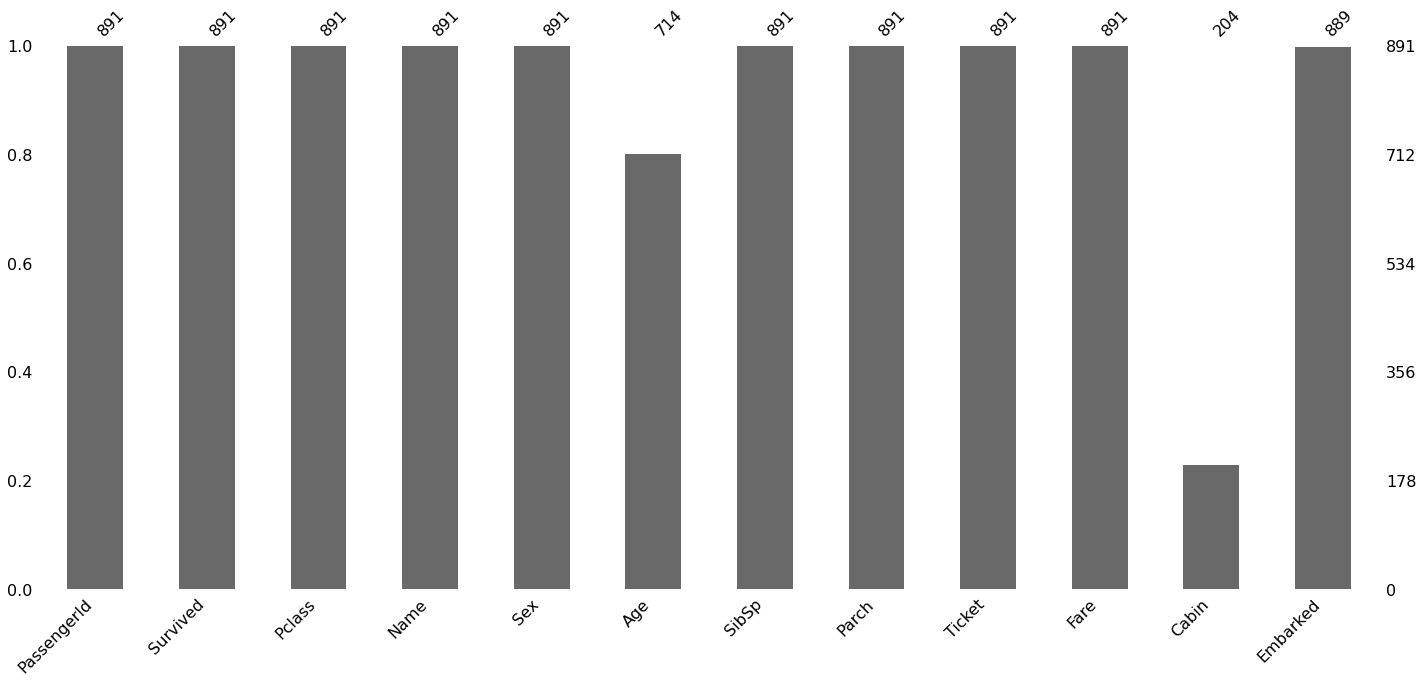

In [36]:
msno.bar(df)
plt.show()

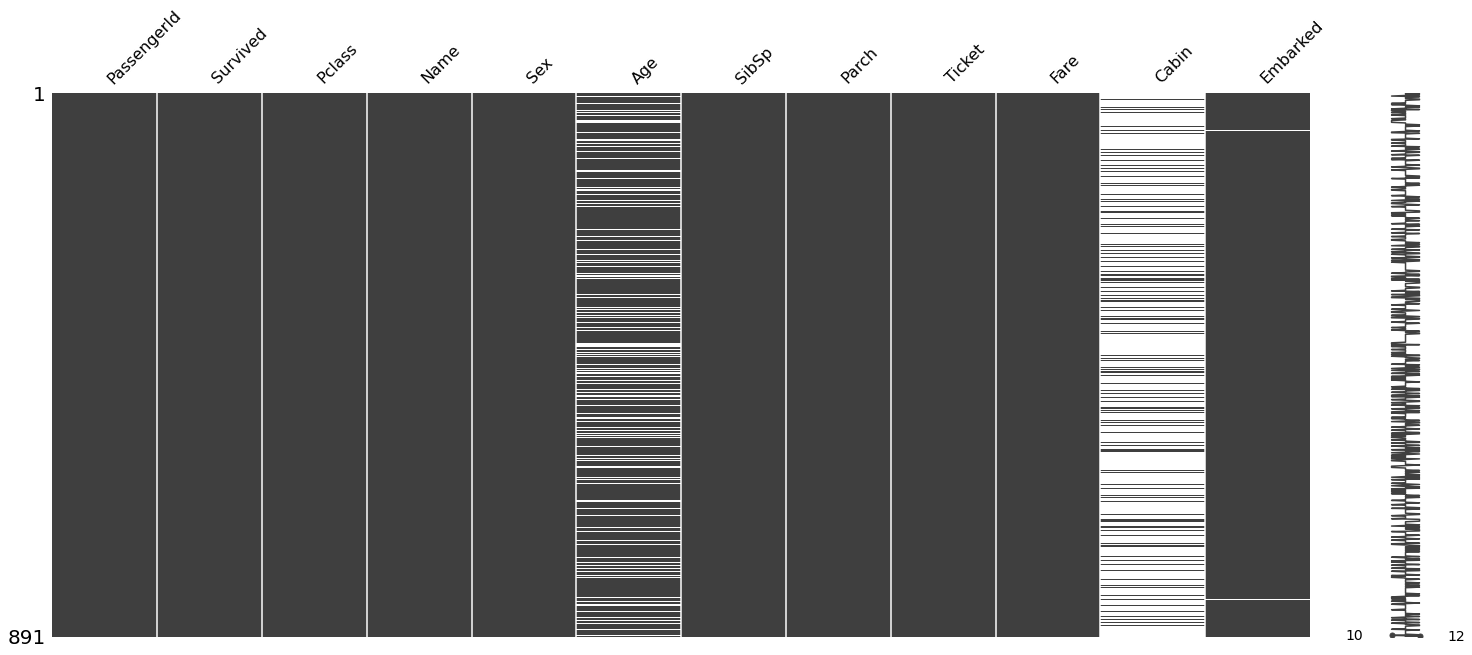

In [37]:
msno.matrix(df)
plt.show()

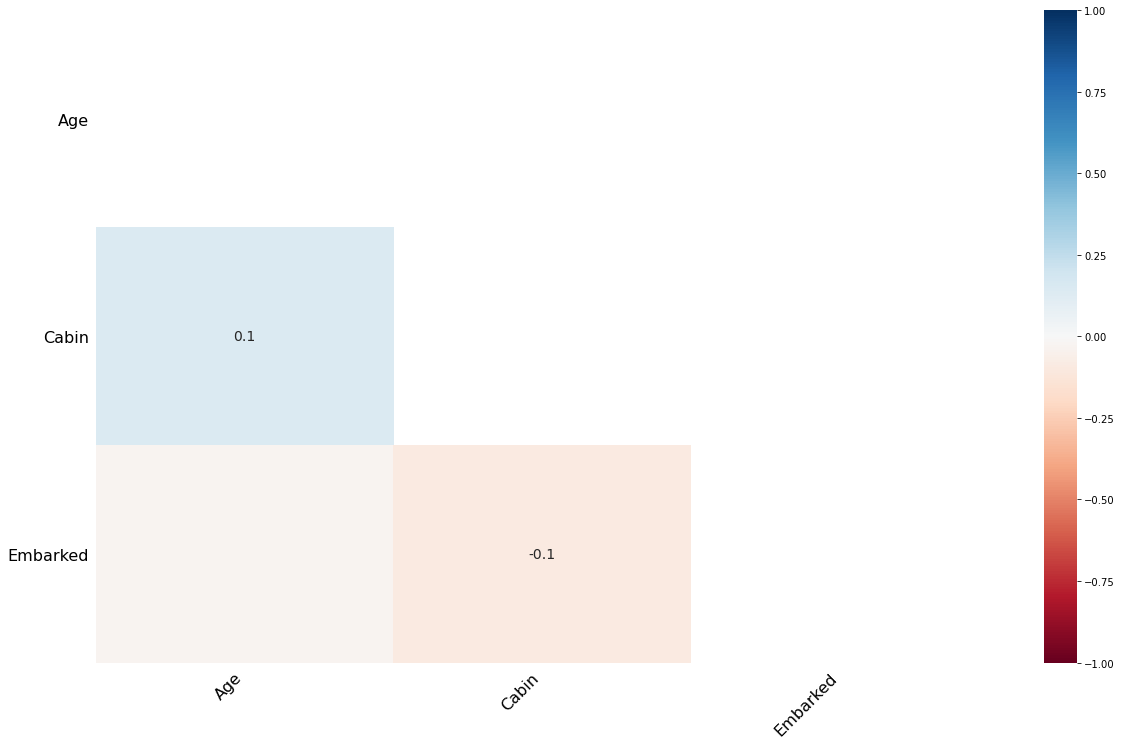

In [38]:
msno.heatmap(df)
plt.show()

#### 2 .missing_vs_target

In [39]:
missing_values_table(df, True)
na_cols = missing_values_table(df, True)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220
          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


In [40]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")


missing_vs_target(df, "Survived", na_cols)

             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.406    714
1                  0.294    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                    0.667    204
1                    0.300    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                       0.382    889
1                       1.000      2




In [42]:
# RECAP - 1
df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
# RECAP - 2
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [44]:
# RECAP - 3
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean"))

0     22.000
1     38.000
2     26.000
3     35.000
4     35.000
       ...  
886   27.000
887   19.000
888   27.916
889   26.000
890   32.000
Name: Age, Length: 891, dtype: float64

In [45]:
# RECAP - 4
na_cols = missing_values_table(df, True)
missing_vs_target(df, "Survived", na_cols)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220
             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.406    714
1                  0.294    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                    0.667    204
1                    0.300    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                       0.382    889
1                       1.000      2


